In [1]:
# 매 강의 시작시마다 동일하게 처리해야 함
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:13pt;
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:15px;
</style>
"""))

<b><font size="5" color="red">ch10. N차원 배열 다루기</font></b>
# 4절. 복사와 뷰
## 4.1 할당

In [2]:
import numpy as np

In [5]:
# a = np.array([0,1,2,3,4,5])
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [7]:
b = a

In [8]:
# a와 b가 같은 객체냐?
a is b

True

In [9]:
b.shape = (2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [10]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(View)
- 슬라이싱할 경우 자동 view가 생성

In [12]:
c = np.arange(12).reshape(2, -1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [13]:
d = c.view() # c의 뷰를 생성 : 얕은 복사
d is c # C객체와 d객체가 같냐?

False

In [14]:
id(c), id(d)

(2475032098736, 2475032098832)

In [15]:
c == d # c와 d의 내용이 모두 같음

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [16]:
np.all(c == d)

True

In [22]:
d.shape = (3, 4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
d[0, 0::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [26]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [27]:
# 슬라이싱이 될 때 자동 뷰가 반환됨

c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [28]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [30]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

## 4.3 깊은 복사

In [31]:
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [33]:
d = c[:, :-1].copy() # 깊은 복사
d[..., -2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [34]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [36]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [51]:
a[ [0, 0, 1, 5] ]

array([ 0,  0,  1, 25])

In [40]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [41]:
# 인덱싱하기 위한 값을 배열로 반듬
j = np.array([[0,0],
            [1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [ ]:
# image_data = [[[255,255,255],
#                [255,255,255],
#                [255,255,255],
#                [0,0,0],
#               ],
#              ]

In [58]:
                   # R G B
palette = np.array([[0,0,0], # black
                   [255,0,0], # red
                   [0,255,0], # greeen
                   [0,0,255], # blue
                   [255,255,255]]) # white

In [62]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[[image_index]]

In [63]:
image_data.shape

(1, 10, 10, 3)

TypeError: Invalid shape (1, 10, 10, 3) for image data

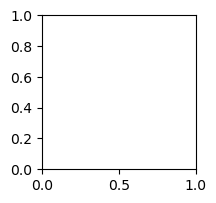

In [64]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [68]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [69]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False, False])

In [71]:
a[a%2==0] #논리 배열을 이용한 인덱싱 시 True요소만 추출

array([ 0, 10, 12, 14])

In [72]:
# a배열에서 12보다 큰 값만 추출
a[a>12]

array([13, 14, 15, 99])

# 6절. 선형대수
- 2차원 넘파이 배열을 행령
    * 행렬 곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬@행렬 = 단위
    * 전치행렬 : 행렬.T / 행렬.transpose()

In [73]:
a = np.array([[1,2],
            [3,4]])
a # 정방행렬

array([[1, 2],
       [3, 4]])

In [75]:
# a의 역행렬 : a의 역행렬 @ a = a@a의 역행렬 => 단위행렬

np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립 방정식 풀기(독립변수1, 데이터2)

In [11]:
import numpy as np
x = np.array([2, 4]) # 독리변수
Y = np.array([40, 60]) # 종속변수
# X = np.dstack( (x, np.ones(len(x)))) # dstack : 차원증가
X = np.column_stack((x, np.ones(len(x))))
X, X.shape

(array([[2., 1.],
        [4., 1.]]),
 (2, 2))

In [17]:
Y.reshape(-1,1) # 출력결과가 나오면 Y는 그대로, return값만 출력

array([[40],
       [60]])

In [16]:
# x @ wb = Y
# X의 역행렬 @ X @ wb=X의 역행렬 @ Y
# wb = X의 역행렬 @ ㅛ
wb = np.linalg.inv(X) @ Y
wb

array([10., 20.])

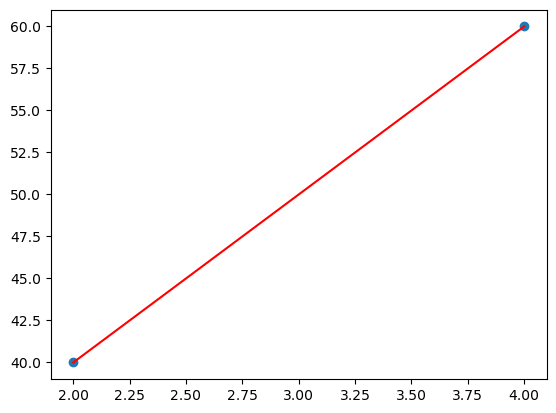

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, 10*x+20, 'r')
plt.show()

In [23]:
np.linalg.solve(X, Y) # w(기울기, b(Y절편)을 구하는 함수

array([10., 20.])

## 6.2 선형연립방정식 풀기(회귀분석) : 독립변수 1개, 데이터 n개

In [26]:
x = np.array([32,64,96,118])
X = np.c_[x, np.ones(len(x))]
X # 정방행렬이 아님

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.]])

In [ ]:
# np.linalg.inv(X) x가 정방행렬이 아니면 역행렬을 구할 수 없음

In [28]:
X.T, X.transpose() # 전치행렬

(array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]),
 array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]))

In [29]:
X_ = X.T @ X
X_

array([[2.826e+04, 3.100e+02],
       [3.100e+02, 4.000e+00]])

In [31]:
# x가 정방행렬이 아니 경우, X.T @X로 정방행렬을 만든 후 역행렬을 곱
np.linalg.inv(X_) @ X_

array([[1., 0.],
       [0., 1.]])

In [39]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])
# X = np.c_[x,np.ones(8)]
X = np.c_[x,np.ones(x.shape)]
Y = y.reshape(-1, 1)
X, Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [41]:
#             X @ wb = Y 
#       X_(X.T @ X) @ wb = X.T @ Y
# (X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
# # X_의 역행렬 @ X_ @ wb = X_의 역행렬 @ X.T @ Y

wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [47]:
print(wb[0,0], wb[1,0]) # 기울기와 Y절편
y_hat = wb[0,0] * x + wb[1,0]
print('독립변수 : ', x)
print('종속변수 : ', y)
print('예측값 : ', y_hat)

0.8749312625981291 -26.79078616795418
독립변수 :  [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 :  [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 :  [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


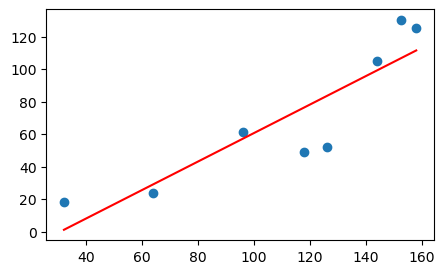

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
plt.show()

# 7절. 연습문제
## 실습형

In [55]:
# 1.
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

In [58]:
type(iris.data), iris_data.dtype, iris_data.shape # 150행 4열짜리 float 배열

(numpy.ndarray, dtype('float64'), (150, 4))

In [60]:
# 실습형 1. 열별평균
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data


In [62]:
mean_values = np.mean(iris_data, axis=0)
print(mean_values)

[5.84333333 3.05733333 3.758      1.19933333]


In [120]:
# 문제풀이

iris_data.mean()
np.mean(iris_data, axis=0)
np.average(iris_data, axis=0) # iris_data.average(axis=0)은 에러

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [63]:
# 실습형 2. 처음 다섯 개 행
print(iris_data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [124]:
# 문제풀이
iris_data[:5] #iris_data[:5,], iris_data[:5,:] iris_data[:5,...]
# iris_data[[0, 1, 3, 4]] 가능하나 비추임

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [66]:
# 실습형 3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
print(iris_data[:, :-1])

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

In [125]:
# 문제풀이
ex3 = iris_data[:5, :-1]
ex3


array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [74]:
# 실습형 4. 처음 다섯개 행에서 마지막 열만 출력
print(iris_data[:5, -1])


[0.2 0.2 0.2 0.2 0.2]


In [126]:
# 문제풀이 
ex4 = iris_data[:5,-1] #iris_data[:5,-1:]라고 하면 5행1열로 됨
ex4


array([0.2, 0.2, 0.2, 0.2, 0.2])

In [86]:
# 실습형 5. 3번 배열과 4번 배열을 원래 모양으로 합하기
# 좀 헷갈림

iris = datasets.load_iris()
iris_data = iris.data
x_part = iris_data[:5, :-1]
y_part = iris_data[:5, -1]
y_part = y_part.reshape(-1, 1)
XY = np.concatenate((x_part, y_part), axis=1)
print(XY)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [134]:
# 문제풀이
answer1 = np.c_[ex3,ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
print(answer1)
# 위의 5개 답이 다 같은지 여부
answer = [answer1, answer2, answer3, answer4, answer5]
# all([np.all(answer1 == answer) for answer in answer1])
all(np.all(answer1 == answer) for answer in answer1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


False

In [140]:
def same_all(*answers):
    if len(answers) > 0:
        first = answers[0]
        return all(np.all(first == answer) for answer in answer1)
    else:
        return false


In [136]:
same_all(answer1, answer2, answer3, answer4, answer5) # 위 9번째 줄부 터를 대체

False

In [139]:
answer1 = np.c_[ex3,ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
print(answer1)
# 위의 5개 답이 다 같은지 여부
answer = [answer1, answer2, answer3, answer4, answer5]
# all([np.all(answer1 == answer) for answer in answer1])
all(np.all(answer1 == answer) for answer in answer1)
same_all(answer1, answer2, answer3, answer4, answer5) # 위 9번째 줄부 터를 대체

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


False

In [88]:
# 실습형 6. 처음 다섯개 행을 이용해서 각 열 평균보다 큰 값만 출력
# 많이 헷갈림

iris = datasets.load_iris()
iris_data = iris.data
data_part = iris_data[:5]
mean_values = np.mean(data_part, axis=0)
mask = data_part > mean_values
result = data_part[mask]

print('각 열의 평균 : ', mean_values)
print('평균보다 큰 값들 :', result)

각 열의 평균 :  [4.86 3.28 1.4  0.2 ]
평균보다 큰 값들 : [5.1 3.5 4.9 1.5 5.  3.6]


In [128]:
# 문제풀이
sample = iris_data[:5]
sample[sample > np.mean(sample, axis=0)]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [143]:
sample = iris_data[:5].copy()
print(sample)
print(np.mean(sample, axis=0))
sample[sample > np.mean(sample, axis=0)]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[4.86 3.28 1.4  0.2 ]


array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [129]:
print(sample)
print('열별 평균 : ', np.mean(sample, axis=0))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
열별 평균 :  [4.86 3.28 1.4  0.2 ]


In [145]:
sample[sample <= np.mean(sample, axis=0)] = None # 결측치(타입 :float)

In [148]:
x = sample.copy()
x[x<=np.mean(x, axis=0)] = None
print(sample)

[[5.1 3.5 nan nan]
 [4.9 nan nan nan]
 [nan nan nan nan]
 [nan nan 1.5 nan]
 [5.  3.6 nan nan]]


In [155]:
sample = iris_data[:5].copy()
# 위의 결과를 출력
np.where(sample > np.mean(sample, axis=0), sample, None) # sample 배열은 안 바뀜

array([[5.1, 3.5, None, None],
       [4.9, None, None, None],
       [None, None, None, None],
       [None, None, 1.5, None],
       [5.0, 3.6, None, None]], dtype=object)

## 서술형

In [156]:
# 문제풀이형 1.
# (3)

import numpy as np
a = np.arange(12).reshape(3,4)
a
print(a.sum(0))

[12 15 18 21]


In [119]:
# 문제풀이형 2.
# 차원변경 : a.reshape(6,2)
# 차원변경 : a.T

a = np.floor(10*np.random.random((3,4)))
a.shape


# a.ravel()
a.reshape(6,2)
# a.resize((2,6))
a.T



array([[2., 1., 8.],
       [5., 5., 4.],
       [4., 2., 3.],
       [1., 6., 7.]])

In [103]:
# 문제풀이형 3.
# (1)
a = np.arange(12).reshape(3,4)

a[:2]
# a[:,:2]
# a[1,2]
# a[1][2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [104]:
# 문제풀이형 4.
# (2)

a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a


array([1, 0, 3, 0, 0])

In [113]:
# 문제풀이형 5.
# (2)

a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

# np.r_[a,b]
np.c_[a,b]
# np.ix_(a,b)
#  [[a],[b]]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [157]:
# 문제풀이
# 문제풀이형5. (2)
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
answer1 = np.c_[a,b]
answer2 = np.column_stack( [a,b] )
answer3 = np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
answer4 = np.stack([a,b], axis=1)
answer5 = np.stack([a,b], axis=-1)
answers = [answer1, answer2, answer3, answer4, answer5]
all(np.all(answer == answer1) for answer in answers)
same_all(*answers)

False